In [1]:
# Update sklearn to prevent version mismatches
#!pip install sklearn --upgrade

In [2]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
#!pip install joblib

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Read the CSV and Perform Basic Data Cleaning

In [4]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
data_df = df.dropna()
data_df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [5]:
# Get rid of all the "_err columns" to get a cleaner dataframe:

data_df = data_df[['koi_disposition',
                   'koi_impact', 
                    'koi_duration', 
                    'koi_depth', 
                    'koi_prad',
                    'koi_period',
                    'koi_teq',
                    'koi_insol',
                    'koi_model_snr']]
data_df

,koi_disposition,koi_impact,koi_duration,koi_depth,koi_prad,koi_period,koi_teq,koi_insol,koi_model_snr
0,CONFIRMED,0.586,4.50700,874.8,2.83,54.418383,443,9.11,25.8
1,FALSE POSITIVE,0.969,1.78220,10829.0,14.60,19.899140,638,39.30,76.3
2,FALSE POSITIVE,1.276,2.40641,8079.2,33.46,1.736952,1395,891.96,505.6
3,CONFIRMED,0.701,1.65450,603.3,2.75,2.525592,1406,926.16,40.9
4,CONFIRMED,0.762,3.14020,686.0,2.77,4.134435,1160,427.65,40.2
...,...,...,...,...,...,...,...,...,...
6986,FALSE POSITIVE,0.765,4.80600,87.7,1.11,8.589871,929,176.40,8.4
6987,FALSE POSITIVE,1.252,3.22210,1579.2,29.35,0.527699,2088,4500.53,453.3
6988,CANDIDATE,0.043,3.11400,48.5,0.72,1.739849,1608,1585.81,10.6
6989,FALSE POSITIVE,0.147,0.86500,103.6,1.07,0.681402,2218,5713.41,12.3


In [6]:
# Replace string labels with numbers so that it doesn't crash the z score analysis below. 

data_df2 = data_df.replace({'CONFIRMED': 1, 'FALSE POSITIVE': 2, 'CANDIDATE': 3})

data_df2

,koi_disposition,koi_impact,koi_duration,koi_depth,koi_prad,koi_period,koi_teq,koi_insol,koi_model_snr
0,1,0.586,4.50700,874.8,2.83,54.418383,443,9.11,25.8
1,2,0.969,1.78220,10829.0,14.60,19.899140,638,39.30,76.3
2,2,1.276,2.40641,8079.2,33.46,1.736952,1395,891.96,505.6
3,1,0.701,1.65450,603.3,2.75,2.525592,1406,926.16,40.9
4,1,0.762,3.14020,686.0,2.77,4.134435,1160,427.65,40.2
...,...,...,...,...,...,...,...,...,...
6986,2,0.765,4.80600,87.7,1.11,8.589871,929,176.40,8.4
6987,2,1.252,3.22210,1579.2,29.35,0.527699,2088,4500.53,453.3
6988,3,0.043,3.11400,48.5,0.72,1.739849,1608,1585.81,10.6
6989,2,0.147,0.86500,103.6,1.07,0.681402,2218,5713.41,12.3


In [7]:
# Check shape of data frame:

data_df2.shape

(6991, 9)

In [8]:
# Get initial look of statistical spread:

data_df2.describe()

,koi_disposition,koi_impact,koi_duration,koi_depth,koi_prad,koi_period,koi_teq,koi_insol,koi_model_snr
count,6991.000000,6991.000000,6991.000000,6.991000e+03,6991.000000,6991.000000,6991.000000,6.991000e+03,6991.000000
mean,1.983836,0.730631,5.549368,2.391190e+04,121.194193,56.191248,1095.152768,8.263769e+03,276.038764
std,0.706112,3.346956,6.425205,8.241240e+04,3519.737626,117.570962,856.234809,1.775255e+05,824.788481
min,1.000000,0.000000,0.167000,7.500000e+00,0.140000,0.259820,92.000000,2.000000e-02,1.600000
25%,1.000000,0.198000,2.446000,1.604000e+02,1.400000,2.620126,554.000000,2.227000e+01,12.400000
50%,2.000000,0.539000,3.793000,4.245000e+02,2.420000,8.947426,888.000000,1.466700e+02,23.700000
75%,2.000000,0.891000,6.197500,1.533250e+03,15.965000,34.282605,1397.500000,9.006700e+02,82.250000
max,3.000000,100.806000,138.540000,1.541400e+06,200346.000000,1071.232624,14667.000000,1.094755e+07,9054.700000


In [9]:
# Get z scores, which will help us get rid of outliers in farther below:

z = np.abs(stats.zscore(data_df2))
z

array([[1.39341448, 0.04321565, 0.16224274, ..., 0.76170626, 0.04650177,
        0.3034192 ],
       [0.02289268, 0.07122488, 0.58635293, ..., 0.5339487 , 0.0463317 ,
        0.242187  ],
       [0.02289268, 0.16295659, 0.48919577, ..., 0.35021781, 0.04152833,
        0.27834731],
       ...,
       [1.43919983, 0.20546424, 0.37906067, ..., 0.59899914, 0.03761959,
        0.32184949],
       [0.02289268, 0.174389  , 0.72911345, ..., 1.3114715 , 0.01436718,
        0.31978821],
       [0.02289268, 0.1782734 , 0.384664  , ..., 0.19954743, 0.04313125,
        0.32475953]])

In [10]:
# Check how many outliers there are:
threshold = 3
outliers = np.where(z > 3)
print (len(outliers[0]))

854


In [11]:
# Filter out outliers. This next line will KEEP rows with z in an acceptable range. 

data_df_clean = data_df2[(z < 3).all(axis=1)]
data_df_clean

,koi_disposition,koi_impact,koi_duration,koi_depth,koi_prad,koi_period,koi_teq,koi_insol,koi_model_snr
0,1,0.586,4.50700,874.8,2.83,54.418383,443,9.11,25.8
1,2,0.969,1.78220,10829.0,14.60,19.899140,638,39.30,76.3
2,2,1.276,2.40641,8079.2,33.46,1.736952,1395,891.96,505.6
3,1,0.701,1.65450,603.3,2.75,2.525592,1406,926.16,40.9
4,1,0.762,3.14020,686.0,2.77,4.134435,1160,427.65,40.2
...,...,...,...,...,...,...,...,...,...
6986,2,0.765,4.80600,87.7,1.11,8.589871,929,176.40,8.4
6987,2,1.252,3.22210,1579.2,29.35,0.527699,2088,4500.53,453.3
6988,3,0.043,3.11400,48.5,0.72,1.739849,1608,1585.81,10.6
6989,2,0.147,0.86500,103.6,1.07,0.681402,2218,5713.41,12.3


In [12]:
# Glance at cleaner data:

data_df_clean.describe()

,koi_disposition,koi_impact,koi_duration,koi_depth,koi_prad,koi_period,koi_teq,koi_insol,koi_model_snr
count,6240.000000,6240.000000,6240.000000,6240.000000,6240.000000,6240.000000,6240.000000,6240.000000,6240.000000
mean,1.970994,0.576643,4.742443,9969.504728,14.940651,41.090670,1058.194071,1489.857029,145.592692
std,0.737317,0.523541,3.864667,34188.804893,53.770081,82.767271,650.418122,4243.471753,371.999044
min,1.000000,0.000000,0.167000,7.500000,0.140000,0.259820,106.000000,0.030000,1.600000
25%,1.000000,0.187450,2.342100,149.000000,1.340000,2.615921,578.000000,26.385000,12.400000
50%,2.000000,0.544000,3.549000,377.800000,2.230000,8.464073,899.000000,154.490000,22.700000
75%,3.000000,0.892625,5.679250,1146.625000,8.175000,29.222481,1389.000000,880.172500,63.125000
max,3.000000,9.666000,24.790000,269850.000000,1680.990000,407.976230,3662.000000,42618.460000,2717.000000


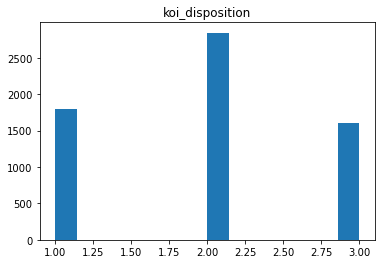

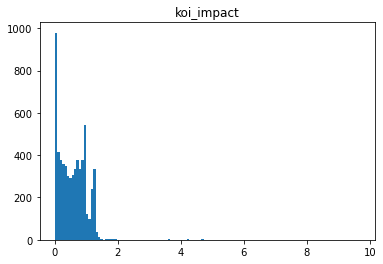

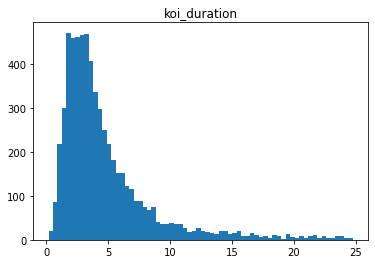

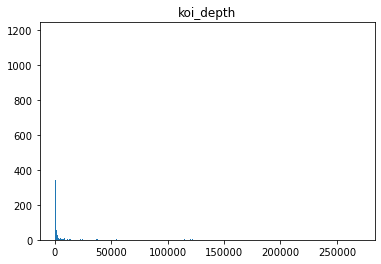

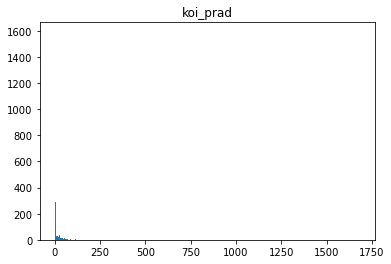

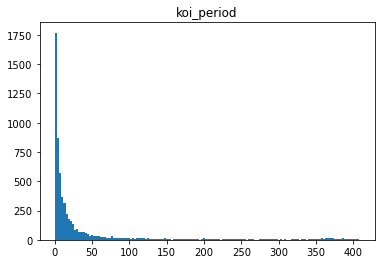

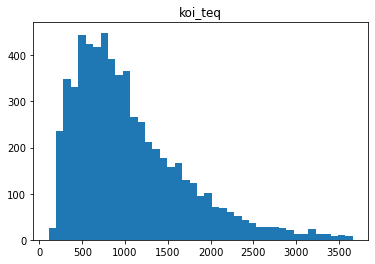

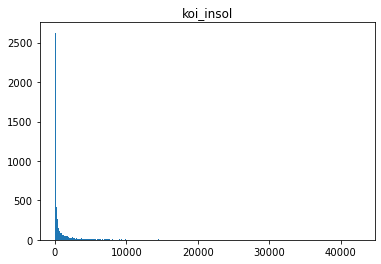

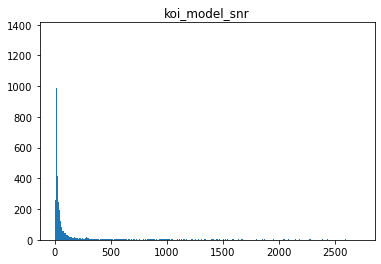

In [13]:
# Feature engineering. Explore each variable distribution, looking for wide distribution (helpful), unified distribution (not helpful)
# or variables that mirror each other (discard one). 

for column in data_df_clean:
    x = data_df_clean[column]
    plt.hist(x, bins='auto', range=(x.min(), x.max()) )
    plt.title(f'{column}') 
    plt.show()

# Select your features (columns)

In [14]:
# Set features. This will also be used as your x values. From the analysis above, 5 features seem to have 
# useful distributions:

selected_features = data_df_clean[['koi_impact', 
                            'koi_duration',
                            'koi_period',
                            'koi_teq',
                            'koi_model_snr']]
selected_features.describe()

,koi_impact,koi_duration,koi_period,koi_teq,koi_model_snr
count,6240.000000,6240.000000,6240.000000,6240.000000,6240.000000
mean,0.576643,4.742443,41.090670,1058.194071,145.592692
std,0.523541,3.864667,82.767271,650.418122,371.999044
min,0.000000,0.167000,0.259820,106.000000,1.600000
25%,0.187450,2.342100,2.615921,578.000000,12.400000
50%,0.544000,3.549000,8.464073,899.000000,22.700000
75%,0.892625,5.679250,29.222481,1389.000000,63.125000
max,9.666000,24.790000,407.976230,3662.000000,2717.000000


In [15]:
# Insert labels back in. 

data_df_clean2 = data_df_clean.replace({1 : 'CONFIRMED', 2 :'FALSE POSITIVE', 3: 'CANDIDATE'})

data_df_clean2

,koi_disposition,koi_impact,koi_duration,koi_depth,koi_prad,koi_period,koi_teq,koi_insol,koi_model_snr
0,CONFIRMED,0.586,4.507,874.8,2.83,54.418383,443,9.11,25.8
1,FALSE POSITIVE,0.969,1.7822,10829.0,14.6,19.899140,638,39.3,76.3
2,FALSE POSITIVE,1.276,2.40641,8079.2,33.46,1.736952,1395,891.96,505.6
3,CONFIRMED,0.701,1.6545,603.3,2.75,2.525592,1406,926.16,40.9
4,CONFIRMED,0.762,3.1402,686.0,2.77,4.134435,1160,427.65,40.2
...,...,...,...,...,...,...,...,...,...
6986,FALSE POSITIVE,0.765,4.806,87.7,1.11,8.589871,929,176.4,8.4
6987,FALSE POSITIVE,1.252,3.2221,1579.2,29.35,0.527699,2088,4500.53,453.3
6988,CANDIDATE,0.043,3.114,48.5,0.72,1.739849,1608,1585.81,10.6
6989,FALSE POSITIVE,0.147,0.865,103.6,1.07,0.681402,2218,5713.41,12.3


# Create a Train Test Split

Use `koi_disposition` for the y values

In [20]:
y = data_df_clean["koi_disposition"]

In [21]:
y

0       1
1       2
2       2
3       1
4       1
       ..
6986    2
6987    2
6988    3
6989    2
6990    2
Name: koi_disposition, Length: 6240, dtype: int64

In [22]:
X = selected_features

In [23]:
print(X.shape, y.shape)

(6240, 5) (6240,)


# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [24]:
# Scale the data

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical


X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=1)
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# KNN

In [25]:
from sklearn.neighbors import KNeighborsClassifier

k: 1, Train/Test Score: 1.000/0.596
k: 3, Train/Test Score: 0.770/0.612
k: 5, Train/Test Score: 0.724/0.620
k: 7, Train/Test Score: 0.705/0.622
k: 9, Train/Test Score: 0.688/0.631
k: 11, Train/Test Score: 0.685/0.633
k: 13, Train/Test Score: 0.674/0.625
k: 15, Train/Test Score: 0.674/0.627
k: 17, Train/Test Score: 0.670/0.621
k: 19, Train/Test Score: 0.664/0.622


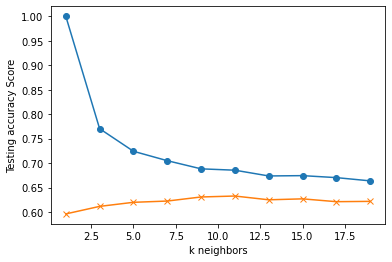

In [22]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [23]:
# k: 13 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train_scaled, y_train)
print('k=13 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=13 Test Acc: 0.625


## Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [24]:
# Create the GridSearchCV model

from sklearn.model_selection import GridSearchCV
kn = KNeighborsClassifier()

params = {
    'n_neighbors' : [5, 25],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_kn = GridSearchCV(estimator = kn,
                       param_grid = params,
                        scoring = 'accuracy', 
                        cv = 5, 
                        verbose = 1,
                        n_jobs = -1)

grid_kn.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [5, 25],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=1)

In [25]:
# extract best estimator
print(grid_kn.best_estimator_)

KNeighborsClassifier(n_neighbors=25)


In [26]:
print(grid_kn.score(X_test, y_test))

0.6423076923076924


In [27]:
print(grid_kn.best_params_)
print(grid_kn.best_score_)

{'algorithm': 'auto', 'n_neighbors': 25, 'weights': 'uniform'}
0.6104700854700855


## KNN Conclusion

KNN didn't get very good results even with the tuning.

# SVC

In [ ]:
# Support vector machine linear classifier

from sklearn.svm import SVC 
model = SVC(kernel='linear')
model.fit(X_train, y_train)

In [ ]:
# Model Accuracy
print('Test Acc: %.3f' % model.score(X_test, y_test))

## SVC Conclusion

It took for ever and never concluded, I'm not sure why. 

# Neural Network



In [18]:
y = data_df_clean2["koi_disposition"]
y

0            CONFIRMED
1       FALSE POSITIVE
2       FALSE POSITIVE
3            CONFIRMED
4            CONFIRMED
             ...      
6986    FALSE POSITIVE
6987    FALSE POSITIVE
6988         CANDIDATE
6989    FALSE POSITIVE
6990    FALSE POSITIVE
Name: koi_disposition, Length: 6240, dtype: object

In [26]:
# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

# Step 2: Convert encoded labels to one-hot-encoding
y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)

In [27]:
y_test_categorical

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.]], dtype=float32)

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(units=100, activation='relu', input_dim=5))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=3, activation='softmax'))

In [38]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 100)               600       
_________________________________________________________________
dense_10 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_11 (Dense)             (None, 3)                 303       
Total params: 11,003
Trainable params: 11,003
Non-trainable params: 0
_________________________________________________________________


In [39]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=100,
    shuffle=True,
    verbose=2
)

Epoch 1/100
147/147 - 0s - loss: 0.9733 - accuracy: 0.4932
Epoch 2/100
147/147 - 0s - loss: 0.8857 - accuracy: 0.5853
Epoch 3/100
147/147 - 0s - loss: 0.8603 - accuracy: 0.6011
Epoch 4/100
147/147 - 0s - loss: 0.8507 - accuracy: 0.6056
Epoch 5/100
147/147 - 0s - loss: 0.8392 - accuracy: 0.6077
Epoch 6/100
147/147 - 0s - loss: 0.8328 - accuracy: 0.6147
Epoch 7/100
147/147 - 0s - loss: 0.8286 - accuracy: 0.6126
Epoch 8/100
147/147 - 0s - loss: 0.8123 - accuracy: 0.6295
Epoch 9/100
147/147 - 0s - loss: 0.8022 - accuracy: 0.6357
Epoch 10/100
147/147 - 0s - loss: 0.7960 - accuracy: 0.6453
Epoch 11/100
147/147 - 0s - loss: 0.7844 - accuracy: 0.6519
Epoch 12/100
147/147 - 0s - loss: 0.7757 - accuracy: 0.6577
Epoch 13/100
147/147 - 0s - loss: 0.7642 - accuracy: 0.6652
Epoch 14/100
147/147 - 0s - loss: 0.7562 - accuracy: 0.6718
Epoch 15/100
147/147 - 0s - loss: 0.7503 - accuracy: 0.6709
Epoch 16/100
147/147 - 0s - loss: 0.7431 - accuracy: 0.6808
Epoch 17/100
147/147 - 0s - loss: 0.7416 - accura

In [40]:
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

49/49 - 0s - loss: 0.6153 - accuracy: 0.7545
Normal Neural Network - Loss: 0.6152528524398804, Accuracy: 0.754487156867981


## Neural Network Conclusion

After experimenting with  various number of layers, units and features, an Accuracy of .75 was the best I could produce. This was still better than the results from simpler models, and statistically useful result, although it's not a very high level of confidence. 

# Save the Model

In [43]:
# Save the model

model.save("exoplanet_prediction.h5")

In [44]:
# Test load of the model
from tensorflow.keras.models import load_model
exoplanet_model = load_model("exoplanet_prediction.h5")

In [46]:
# Test loaded maddel

model_loss, model_accuracy = exoplanet_model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

49/49 - 0s - loss: 0.6153 - accuracy: 0.7545
Normal Neural Network - Loss: 0.6152528524398804, Accuracy: 0.754487156867981
